In [1]:
import numpy as np

from sklearn.datasets import make_blobs, make_classification, make_moons, make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC

from sklearn.metrics import precision_recall_fscore_support

In [8]:
X, Y = make_blobs(n_samples = 1000, n_features = 2, centers = 2, random_state = 1)
#X, Y = make_classification(n_samples = 1000, n_classes = 2, n_features = 2, n_redundant = 0, random_state = 1)
#X, Y = make_moons(n_samples=1000, noise=0.3, random_state=0)
#X, Y = make_circles(n_samples=1000, noise=0.03, factor=0.5, random_state=1)

In [9]:
print(X.shape, Y.shape)

(1000, 2) (1000,)


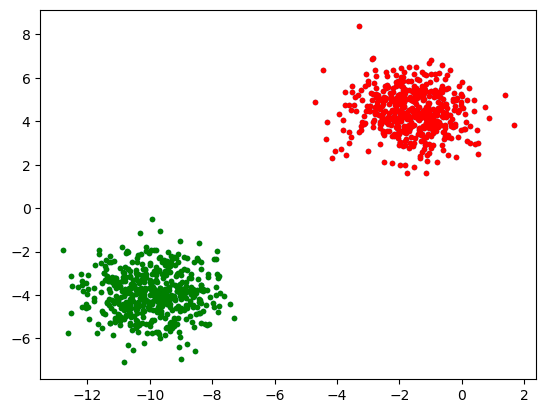

In [10]:
import matplotlib.pyplot as plt

plt.plot(X[:, 0], X[:, 1], '.')
plt.plot(X[Y==0, 0], X[Y==0, 1], 'r.')
plt.plot(X[Y==1, 0], X[Y==1, 1], 'g.')
plt.show()

Creating the Data

In [5]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2)
print(X_Train.shape, Y_Train.shape, X_Test.shape, Y_Test.shape)

(800, 2) (800,) (200, 2) (200,)


In [6]:
from sklearn.inspection import DecisionBoundaryDisplay


feat_1 = np.linspace(X_Train[:, 0].min(), X_Train[:, 0].max(), num=1000)
feat_2 = np.linspace(X_Train[:, 1].min(), X_Train[:, 1].max(), num=1000)

feature_1, feature_2 = np.meshgrid(feat_1, feat_2)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T


k-Nearest Neighbors

In [7]:
clf_kNN = KNeighborsClassifier(5).fit(X_Train, Y_Train)

Y_pred_kNN = clf_kNN.predict(X)

Y_pred_Test_kNN = clf_kNN.predict(X_Test)
# print(clf_kNN.predict(X_Test))
# print(Y_Test)

score_kNN = clf_kNN.score(X_Test, Y_Test)
print(score_kNN)

prec_kNN, rec_kNN, f1_kNN, sp_kNN = precision_recall_fscore_support(Y_Test, Y_pred_Test_kNN, average='macro')

print(prec_kNN, rec_kNN, f1_kNN)

0.88
0.88 0.88 0.88


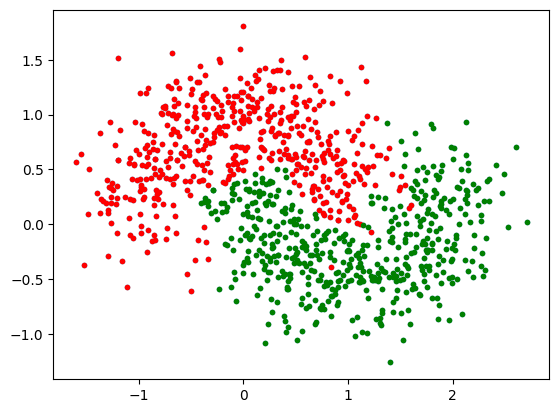

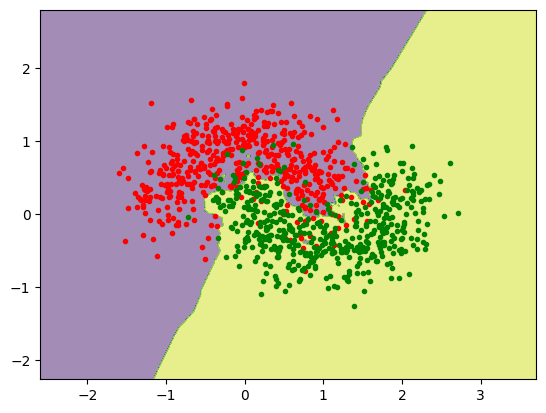

In [8]:

# plt.plot(X[:, 0], X[:, 1], '.')
# plt.plot(X[Y==0, 0], X[Y==0, 1], 'r.')
# plt.plot(X[Y==1, 0], X[Y==1, 1], 'g.')
# plt.show()

plt.plot(X[:, 0], X[:, 1], '.')
plt.plot(X[Y_pred_kNN == 0, 0], X[Y_pred_kNN == 0, 1], 'r.')
plt.plot(X[Y_pred_kNN == 1, 0], X[Y_pred_kNN == 1, 1], 'g.')
plt.show()

disp = DecisionBoundaryDisplay.from_estimator(clf_kNN, X, response_method="predict", alpha=0.5, grid_resolution=1000, eps=1.0)
disp.ax_.plot(X[Y==0, 0], X[Y==0, 1], 'r.')
disp.ax_.plot(X[Y==1, 0], X[Y==1, 1], 'g.')

plt.show()


Logistic Regression

In [9]:
clf_logistic = LogisticRegression(random_state=0).fit(X_Train, Y_Train)

# print(clf_logistic.predict(X_Test))
# print(Y_Test)

score_logistic = clf_logistic.score(X_Test, Y_Test)

print(score_logistic)
Y_pred_logistic = clf_logistic.predict(X)

Y_pred_Test_logistic = clf_logistic.predict(X_Test)



prec_logistic, rec_logistic, f1_logistic, sp_logistic = precision_recall_fscore_support(Y_Test, Y_pred_Test_logistic, average='macro')

print(prec_logistic, rec_logistic, f1_logistic)

0.81
0.8119967793880838 0.81 0.8096955128205128


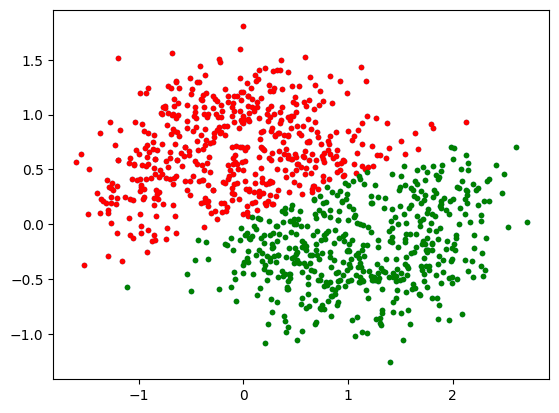

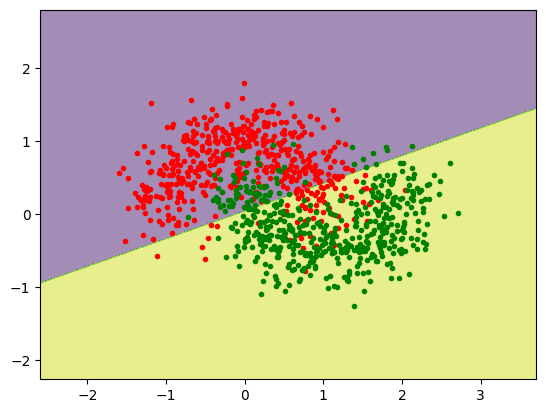

In [10]:

# plt.plot(X[:, 0], X[:, 1], '.')
# plt.plot(X[Y==0, 0], X[Y==0, 1], 'r.')
# plt.plot(X[Y==1, 0], X[Y==1, 1], 'g.')
# plt.show()

plt.plot(X[:, 0], X[:, 1], '.')
plt.plot(X[Y_pred_logistic == 0, 0], X[Y_pred_logistic == 0, 1], 'r.')
plt.plot(X[Y_pred_logistic == 1, 0], X[Y_pred_logistic == 1, 1], 'g.')
plt.show()


disp = DecisionBoundaryDisplay.from_estimator(clf_logistic, X, response_method="predict", alpha=0.5, grid_resolution=1000, eps=1.0)
disp.ax_.plot(X[Y==0, 0], X[Y==0, 1], 'r.')
disp.ax_.plot(X[Y==1, 0], X[Y==1, 1], 'g.')

plt.show()



Naive Bayes with Gaussian features

In [11]:
clf_NB = GaussianNB().fit(X_Train, Y_Train)


# print(clf_NB.predict(X_Test))
# print(Y_Test)

score_NB = clf_NB.score(X_Test, Y_Test)
print(score_NB)

Y_pred_NB = clf_NB.predict(X)
Y_pred_Test_NB = clf_NB.predict(X_Test)

prec_NB, rec_NB, f1_NB, sp_NB = precision_recall_fscore_support(Y_Test, Y_pred_Test_NB, average='macro')

print(prec_NB, rec_NB, f1_NB)


0.815
0.8165511003919204 0.815 0.8147730970438789


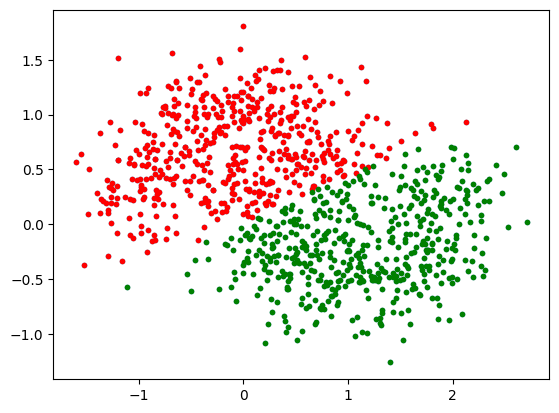

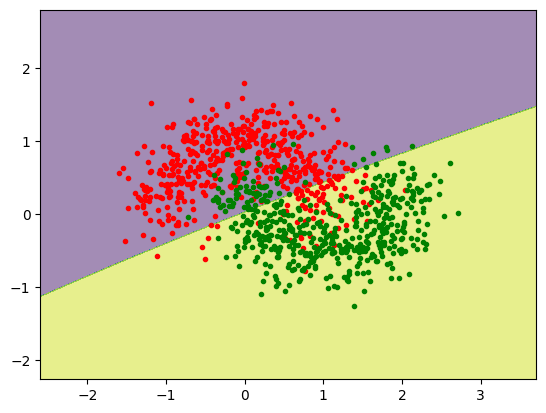

In [12]:

# plt.plot(X[:, 0], X[:, 1], '.')
# plt.plot(X[Y==0, 0], X[Y==0, 1], 'r.')
# plt.plot(X[Y==1, 0], X[Y==1, 1], 'g.')
# plt.show()

plt.plot(X[:, 0], X[:, 1], '.')
plt.plot(X[Y_pred_NB == 0, 0], X[Y_pred_NB == 0, 1], 'r.')
plt.plot(X[Y_pred_NB == 1, 0], X[Y_pred_NB == 1, 1], 'g.')
plt.show()

disp = DecisionBoundaryDisplay.from_estimator(clf_NB, X, response_method="predict", alpha=0.5, grid_resolution=1000, eps=1.0)
disp.ax_.plot(X[Y==0, 0], X[Y==0, 1], 'r.')
disp.ax_.plot(X[Y==1, 0], X[Y==1, 1], 'g.')

plt.show()


Linear Discriminant Analysis

In [13]:
clf_LDA = LinearDiscriminantAnalysis().fit(X_Train, Y_Train)


score_LDA = clf_LDA.score(X_Test, Y_Test)
print(score_LDA)

Y_pred_LDA = clf_LDA.predict(X)

Y_pred_Test_LDA = clf_LDA.predict(X_Test)


prec_LDA, rec_LDA, f1_LDA, sp_LDA = precision_recall_fscore_support(Y_Test, Y_pred_Test_LDA, average='macro')


0.815


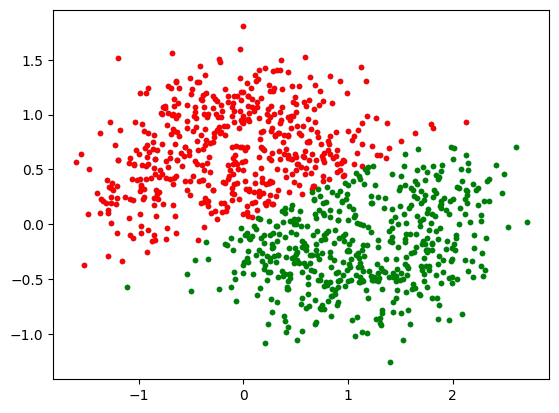

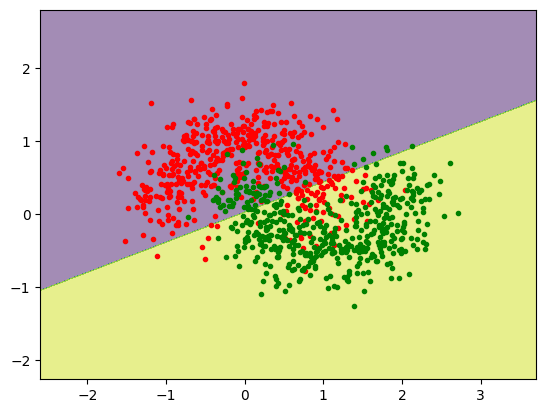

In [14]:

# plt.plot(X[:, 0], X[:, 1], '.')
# plt.plot(X[Y==0, 0], X[Y==0, 1], 'r.')
# plt.plot(X[Y==1, 0], X[Y==1, 1], 'g.')
# plt.show()

plt.plot(X[:, 0], X[:, 1], '.')
plt.plot(X[Y_pred_LDA == 0, 0], X[Y_pred_LDA == 0, 1], 'r.')
plt.plot(X[Y_pred_LDA == 1, 0], X[Y_pred_LDA == 1, 1], 'g.')
plt.show()


disp = DecisionBoundaryDisplay.from_estimator(clf_LDA, X, response_method="predict", alpha=0.5, grid_resolution=1000, eps=1.0)
disp.ax_.plot(X[Y==0, 0], X[Y==0, 1], 'r.')
disp.ax_.plot(X[Y==1, 0], X[Y==1, 1], 'g.')

plt.show()

Quadratic Discriminant Analysis

In [15]:
clf_QDA = QuadraticDiscriminantAnalysis().fit(X_Train, Y_Train)


# print(clf_QDA.predict(X_Test))
# print(Y_Test)

score_QDA = clf_QDA.score(X_Test, Y_Test)
print(score_QDA)

Y_pred_QDA = clf_QDA.predict(X)
Y_pred_Test_QDA = clf_QDA.predict(X_Test)

prec_QDA, rec_QDA, f1_QDA, sp_QDA = precision_recall_fscore_support(Y_Test, Y_pred_Test_QDA, average='macro')




0.815


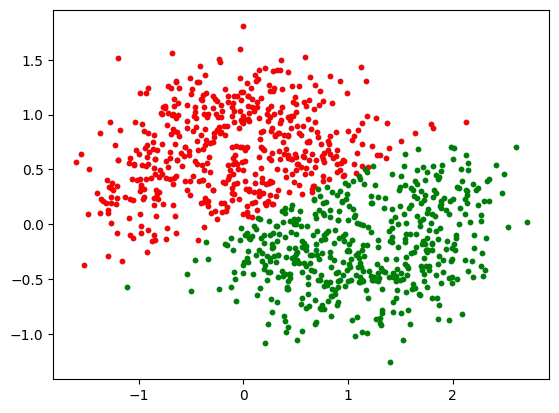

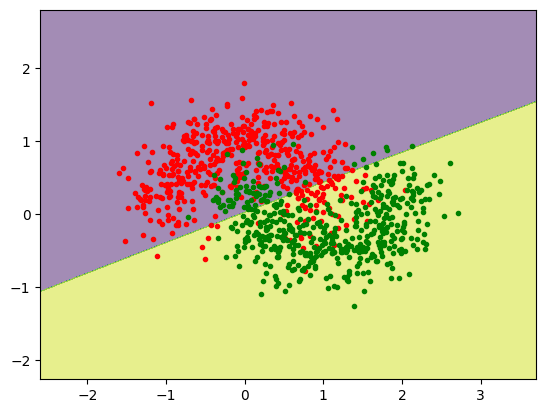

In [16]:

# plt.plot(X[:, 0], X[:, 1], '.')
# plt.plot(X[Y==0, 0], X[Y==0, 1], 'r.')
# plt.plot(X[Y==1, 0], X[Y==1, 1], 'g.')
# plt.show()

plt.plot(X[:, 0], X[:, 1], '.')
plt.plot(X[Y_pred_QDA == 0, 0], X[Y_pred_QDA == 0, 1], 'r.')
plt.plot(X[Y_pred_QDA == 1, 0], X[Y_pred_QDA == 1, 1], 'g.')
plt.show()

disp = DecisionBoundaryDisplay.from_estimator(clf_QDA, X, response_method="predict", alpha=0.5, grid_resolution=1000, eps=1.0)
disp.ax_.plot(X[Y==0, 0], X[Y==0, 1], 'r.')
disp.ax_.plot(X[Y==1, 0], X[Y==1, 1], 'g.')

plt.show()

Support Vector Machines, with Linear, Polynomial, Gaussian (RBF) and Sigmoid Kernels

In [17]:
clf_SVM_Linear = SVC(kernel="linear", C=1).fit(X_Train, Y_Train)
clf_SVM_Polynomial = SVC(kernel="poly", degree=5, C=1).fit(X_Train, Y_Train)
clf_SVM_RBF = SVC(kernel="rbf", C=1, gamma=2).fit(X_Train, Y_Train)
clf_SVM_Sigmoid = SVC(kernel="sigmoid", C=1, gamma=2).fit(X_Train, Y_Train)


# print(clf_SVM_Linear.predict(X_Test))
# print(Y_Test)
score_SVM_Linear = clf_SVM_Linear.score(X_Test, Y_Test)
print(score_SVM_Linear)


# print(clf_SVM_Polynomial.predict(X_Test))
# print(Y_Test)
score_SVM_Polynomial = clf_SVM_Polynomial.score(X_Test, Y_Test)
print(score_SVM_Polynomial)


# print(clf_SVM_RBF.predict(X_Test))
# print(Y_Test)
score_SVM_RBF = clf_SVM_RBF.score(X_Test, Y_Test)
print(score_SVM_RBF)

# print(clf_SVM_RBF.predict(X_Test))
# print(Y_Test)
score_SVM_Sigmoid = clf_SVM_Sigmoid.score(X_Test, Y_Test)
print(score_SVM_Sigmoid)

Y_pred_SVM_Linear = clf_SVM_Linear.predict(X)
Y_pred_SVM_Polynomial = clf_SVM_Polynomial.predict(X)
Y_pred_SVM_RBF = clf_SVM_RBF.predict(X)
Y_pred_SVM_Sigmoid = clf_SVM_Sigmoid.predict(X)

Y_pred_Test_SVM_Linear = clf_SVM_Linear.predict(X_Test)
Y_pred_Test_SVM_Polynomial = clf_SVM_Polynomial.predict(X_Test)
Y_pred_Test_SVM_RBF = clf_SVM_RBF.predict(X_Test)
Y_pred_Test_SVM_Sigmoid = clf_SVM_Sigmoid.predict(X_Test)


prec_SVM_Linear, rec_SVM_Linear, f1_SVM_Linear, sp_SVM_linear = precision_recall_fscore_support(Y_Test, Y_pred_Test_SVM_Linear, average='macro')
prec_SVM_Polynomial, rec_SVM_Polynomial, f1_SVM_Polynomial, sp_SVM_Polynomial = precision_recall_fscore_support(Y_Test, Y_pred_Test_SVM_Polynomial, average='macro')
prec_SVM_RBF, rec_SVM_RBF, f1_SVM_RBF, sp_SVM_RBF = precision_recall_fscore_support(Y_Test, Y_pred_Test_SVM_RBF, average='macro')
prec_SVM_Sigmoid, rec_SVM_Sigmoid, f1_SVM_Sigmoid, sp_SVM_RBF = precision_recall_fscore_support(Y_Test, Y_pred_Test_SVM_Sigmoid, average='macro')


print(prec_SVM_Linear, rec_SVM_Linear, f1_SVM_Linear)
print(prec_SVM_Polynomial, rec_SVM_Polynomial, f1_SVM_Polynomial)
print(prec_SVM_RBF, rec_SVM_RBF, f1_SVM_RBF)
print(prec_SVM_Sigmoid, rec_SVM_Sigmoid, f1_SVM_Sigmoid)

0.815
0.74
0.895
0.595
0.8165511003919204 0.815 0.8147730970438789
0.7805049088359046 0.74 0.7302624753605147
0.8953558202382144 0.895 0.8949763696831787
0.5950855770193173 0.595 0.5949088544922607


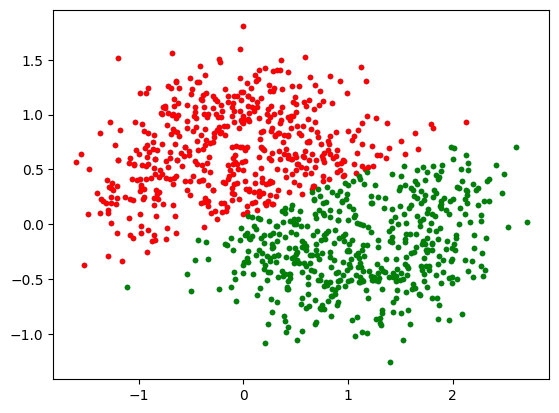

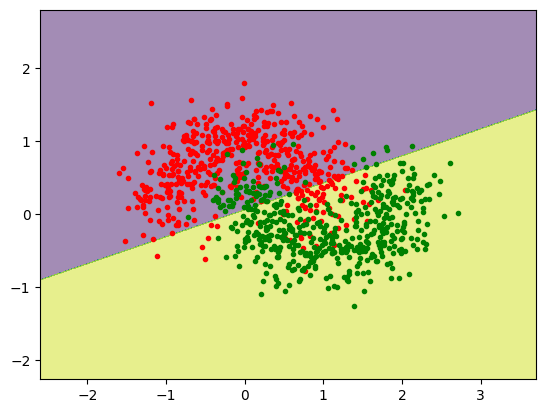

In [18]:

plt.plot(X[:, 0], X[:, 1], '.')
plt.plot(X[Y_pred_SVM_Linear == 0, 0], X[Y_pred_SVM_Linear == 0, 1], 'r.')
plt.plot(X[Y_pred_SVM_Linear == 1, 0], X[Y_pred_SVM_Linear == 1, 1], 'g.')
plt.show()

disp = DecisionBoundaryDisplay.from_estimator(clf_SVM_Linear, X, response_method="predict", alpha=0.5, grid_resolution=1000, eps=1.0)
disp.ax_.plot(X[Y==0, 0], X[Y==0, 1], 'r.')
disp.ax_.plot(X[Y==1, 0], X[Y==1, 1], 'g.')
plt.show()




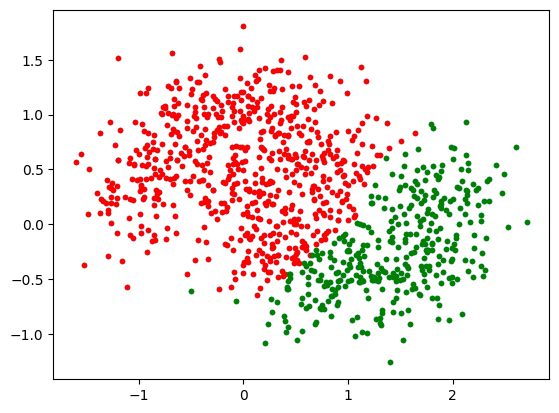

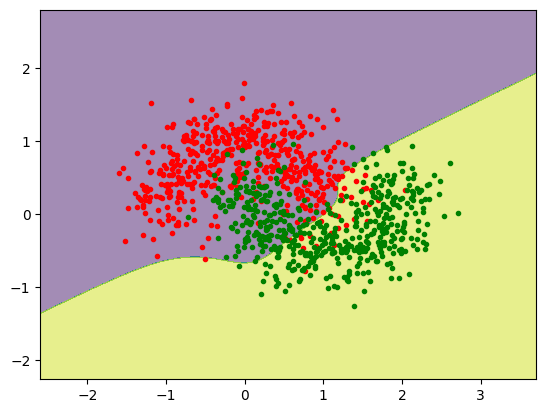

In [19]:
plt.plot(X[:, 0], X[:, 1], '.')
plt.plot(X[Y_pred_SVM_Polynomial == 0, 0], X[Y_pred_SVM_Polynomial == 0, 1], 'r.')
plt.plot(X[Y_pred_SVM_Polynomial == 1, 0], X[Y_pred_SVM_Polynomial == 1, 1], 'g.')
plt.show()

disp = DecisionBoundaryDisplay.from_estimator(clf_SVM_Polynomial, X, response_method="predict", alpha=0.5, grid_resolution=1000, eps=1.0)
disp.ax_.plot(X[Y==0, 0], X[Y==0, 1], 'r.')
disp.ax_.plot(X[Y==1, 0], X[Y==1, 1], 'g.')
plt.show()


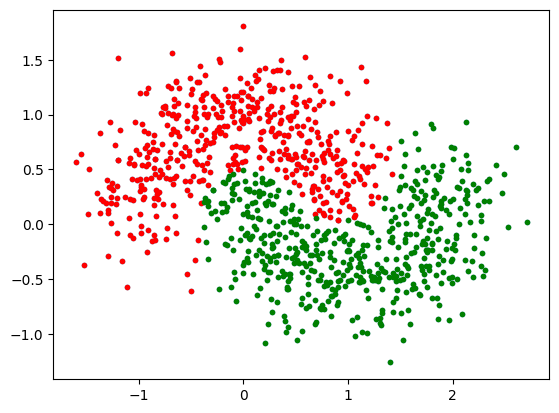

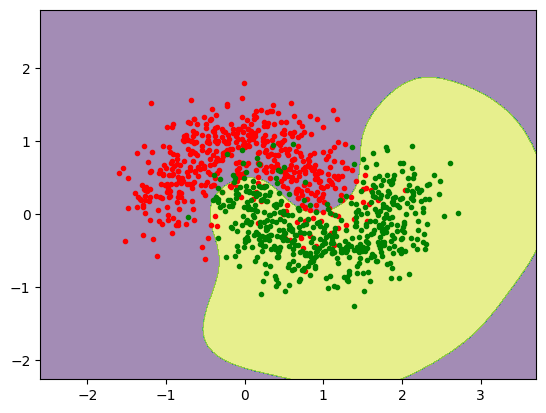

In [20]:
plt.plot(X[:, 0], X[:, 1], '.')
plt.plot(X[Y_pred_SVM_RBF == 0, 0], X[Y_pred_SVM_RBF == 0, 1], 'r.')
plt.plot(X[Y_pred_SVM_RBF == 1, 0], X[Y_pred_SVM_RBF == 1, 1], 'g.')
plt.show()

disp = DecisionBoundaryDisplay.from_estimator(clf_SVM_RBF, X, response_method="predict", alpha=0.5, grid_resolution=1000, eps=1.0)
disp.ax_.plot(X[Y==0, 0], X[Y==0, 1], 'r.')
disp.ax_.plot(X[Y==1, 0], X[Y==1, 1], 'g.')
plt.show()

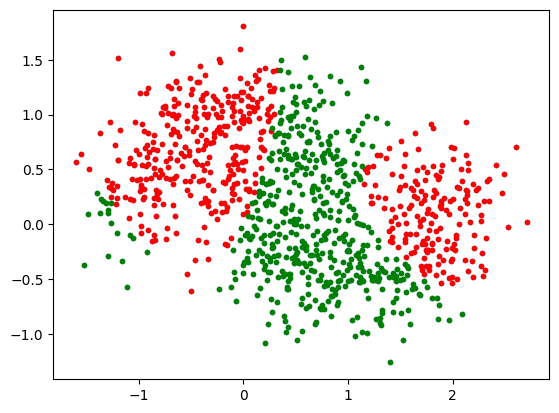

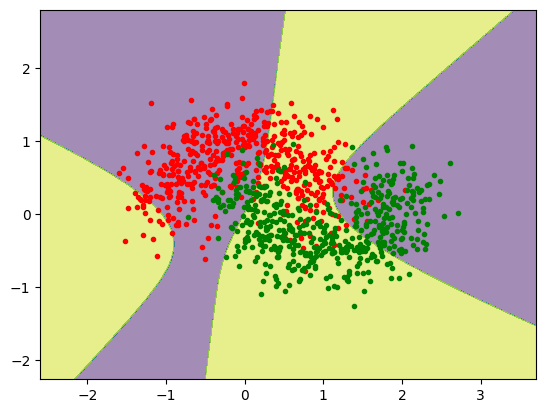

In [21]:
plt.plot(X[:, 0], X[:, 1], '.')
plt.plot(X[Y_pred_SVM_Sigmoid == 0, 0], X[Y_pred_SVM_Sigmoid == 0, 1], 'r.')
plt.plot(X[Y_pred_SVM_Sigmoid == 1, 0], X[Y_pred_SVM_Sigmoid == 1, 1], 'g.')
plt.show()

disp = DecisionBoundaryDisplay.from_estimator(clf_SVM_Sigmoid, X, response_method="predict", alpha=0.5, grid_resolution=1000, eps=1.0)
disp.ax_.plot(X[Y==0, 0], X[Y==0, 1], 'r.')
disp.ax_.plot(X[Y==1, 0], X[Y==1, 1], 'g.')
plt.show()


In [22]:

scores = [score_kNN, score_logistic, score_NB, score_LDA, score_QDA, score_SVM_Linear, score_SVM_Polynomial, score_SVM_RBF, score_SVM_Sigmoid]
precisions = [prec_kNN, prec_logistic, prec_NB, prec_LDA, prec_QDA, prec_SVM_Linear, prec_SVM_Polynomial, prec_SVM_RBF, prec_SVM_Sigmoid]
recalls = [rec_kNN, rec_logistic, rec_NB, rec_LDA, rec_QDA, rec_SVM_Linear, rec_SVM_Polynomial, rec_SVM_RBF, rec_SVM_Sigmoid]
f1s = [f1_kNN, f1_logistic, f1_NB, f1_LDA, f1_QDA, f1_SVM_Linear, f1_SVM_Polynomial, f1_SVM_RBF, f1_SVM_Sigmoid]

# print(['kNN', 'logistic', 'NB', 'LDA', 'QDA', 'SVM_Linear', 'SVM_Polynomial', 'SVM_RBF', 'SVM_Sigmoid'])
# print(np.around(scores, 3))
# print(np.around(precisions, 3))
# print(np.around(recalls, 3))
# print(np.around(f1s, 3))

Results

In [23]:
import pandas as pd
d = {}
d['score'] = np.around(scores, 3)
d['precision'] = np.around(precisions, 3)
d['recall'] = np.around(recalls, 3)
d['F1'] = np.around(f1s, 3)

df = pd.DataFrame(data=d)
df.index = ['kNN', 'logistic', 'NB', 'LDA', 'QDA', 'SVM_Linear', 'SVM_Polynomial', 'SVM_RBF', 'SVM_Sigmoid']

print(df)

                score  precision  recall     F1
kNN             0.880      0.880   0.880  0.880
logistic        0.810      0.812   0.810  0.810
NB              0.815      0.817   0.815  0.815
LDA             0.815      0.817   0.815  0.815
QDA             0.815      0.817   0.815  0.815
SVM_Linear      0.815      0.817   0.815  0.815
SVM_Polynomial  0.740      0.781   0.740  0.730
SVM_RBF         0.895      0.895   0.895  0.895
SVM_Sigmoid     0.595      0.595   0.595  0.595
